In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from pandas.plotting import table

%matplotlib inline

In [44]:
train = pd.read_csv('/Users/BrianLee/Desktop/input/titanic_train.csv')
test = pd.read_csv('/Users/BrianLee/Desktop/input/titanic_test.csv')

In [46]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


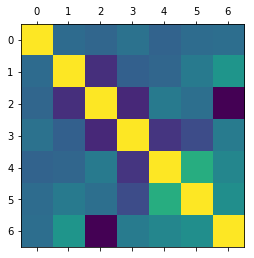

In [14]:
plt.matshow(train.corr())

In [48]:
train, test = train[['PassengerId','Survived','Sex','Pclass','Age']], test[['PassengerId','Sex','Pclass','Age']]

In [30]:
train.head()

,Sex,Pclass,Age
0,male,3,22.0
1,female,1,38.0
2,female,3,26.0
3,female,1,35.0
4,male,3,35.0


In [49]:
titanic_train_test = train.append(test)

titanic_train_test['Age'] = titanic_train_test['Age'].fillna(train['Age'].median())

titanic_Age_range = [(0,10),(11,20),(21,30),(31,50),(51,100)]

Age_range = []
titanic_Age_int = list(map(int,titanic_train_test.Age.values))
for j in range(len(titanic_Age_int)):
    for i in range(len(titanic_Age_range)):
        if titanic_Age_int[j] in range(titanic_Age_range[i][0],titanic_Age_range[i][1]):
            age_range = titanic_Age_range[i]
        else:
            pass
    Age_range.append(age_range)
titanic_train_test['Age_range'] = Age_range

In [51]:
titanic_train_relevant = titanic_train_test[titanic_train_test['PassengerId']<=len(train)]
titanic_test_relevant = titanic_train_test[titanic_train_test['PassengerId']>len(train)]
titanic_train_relevant = titanic_train_relevant.drop(['Age'], axis=1)
titanic_test_relevant = titanic_test_relevant.drop(['Age','Survived'], axis=1)
titanic_train_test_relevant = titanic_train_relevant.append(titanic_test_relevant)
titanic_train_test_relevant = titanic_train_test_relevant.drop('Survived', axis=1)
titanic_train_test_relevant = titanic_train_test_relevant.set_index('PassengerId')


In [52]:
titanic_train_test_relevant.head()

,Age_range,Pclass,Sex
PassengerId,,,
1,"(21, 30)",3,male
2,"(31, 50)",1,female
3,"(21, 30)",3,female
4,"(31, 50)",1,female
5,"(31, 50)",3,male


In [53]:
titanic_train_test_relevant = pd.get_dummies(titanic_train_test_relevant, columns=list(titanic_train_test_relevant.columns.values))

In [54]:
titanic_train_final=titanic_train_test_relevant.iloc[0:len(train)]
titanic_test_final=titanic_train_test_relevant.iloc[len(train):len(titanic_train_test_relevant)]

In [55]:
titanic_train_target = titanic_train_relevant['Survived'].astype(int)

In [56]:
titanic_train_final.head()

,"Age_range_(0, 10)","Age_range_(11, 20)","Age_range_(21, 30)","Age_range_(31, 50)","Age_range_(51, 100)",Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
PassengerId,,,,,,,,,,
1,0,0,1,0,0,0,0,1,0,1
2,0,0,0,1,0,1,0,0,1,0
3,0,0,1,0,0,0,0,1,1,0
4,0,0,0,1,0,1,0,0,1,0
5,0,0,0,1,0,0,0,1,0,1


In [57]:
titanic_test_final.head()

,"Age_range_(0, 10)","Age_range_(11, 20)","Age_range_(21, 30)","Age_range_(31, 50)","Age_range_(51, 100)",Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
PassengerId,,,,,,,,,,
892,0,0,0,1,0,0,0,1,0,1
893,0,0,0,1,0,0,0,1,1,0
894,0,0,0,0,1,0,1,0,0,1
895,0,0,1,0,0,0,0,1,0,1
896,0,0,1,0,0,0,0,1,1,0


In [63]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import KFold
from sklearn import metrics

In [64]:
svc = SVC()
linsvc=LinearSVC()

In [65]:
X_train = titanic_train_final
y_train = titanic_train_target

In [78]:
def find_predicted_values(X_train, y_train,n, ml_algo):
    #n = number of cross validation folds
    #ml_algo = machine learning algorithms
    predictions = []
    kf = KFold(800)#n_splits=n
    
    for train, test in kf.split(X_train,y_train):
        train_data = X_train.iloc[train,:]
        target_data = y_train.iloc[train]
        ml_algo.fit(train_data,target_data)
        test_predict = ml_algo.predict(X_train.iloc[test,:])
        predictions.append(test_predict)
    predictions=np.concatenate(predictions)
    return predictions

In [79]:
svc_predictions = find_predicted_values(X_train,y_train,4,svc)
linsvc_predictions = find_predicted_values(X_train,y_train,4,linsvc)

In [80]:
accuracy_linsvc = metrics.accuracy_score(y_train,linsvc_predictions)
accuracy_linsvc

0.78787878787878785

In [81]:
accuracy_svc = metrics.accuracy_score(y_train,svc_predictions)
accuracy_svc

0.79685746352413023

In [82]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc_submit = SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
clf = GridSearchCV(svc, parameters)
clf.fit(X_train,y_train)
submit_predict = svc.predict(titanic_test_final).astype(int)
submit_predict

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [83]:
submission = pd.DataFrame({
    "PassengerId": titanic_test_final.index,
    "Survived": submit_predict
    })

submission.to_csv('titanic_SVC_submission.csv',index=False)